# Вектора

In [1196]:
import functools
import math
import matplotlib.pyplot as plt
import collections as clt
import random as rnd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Суммирование векторов

In [1197]:
def vector_add(v,w):
    return [v_i + w_i
            for v_i, w_i in zip(v,w)]

In [1198]:
vector_add([1,2],[2,1])

[3, 3]

Разница векторов

In [1199]:
def vector_subtract(v,w):
    return [v_i - w_i
           for v_i, w_i in zip(v,w)]

In [1200]:
vector_subtract([0,15,10,-1],[2,5,6,1])

[-2, 10, 4, -2]

Покомпонентная сумма списка векторов

In [1201]:
def vector_sum(vectors):
    return functools.reduce(vector_add,vectors)

In [1202]:
vector_sum([[1,2],[1,2],[10,10]])

[12, 14]

Умножение вектора на скаляр

In [1203]:
def scalar_multiply(scalar,vector):
    return [scalar * v_i for v_i in vector]

In [1204]:
scalar_multiply(5,[1,1])

[5, 5]

Вычисление покомпонентного среднего значения списка векторов(одинакового размера)

In [1205]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [1206]:
vector_mean([[1,2],[1,2],[10,10]])

[4.0, 4.666666666666666]

Вычисление скалярного произведения. 
Скалярное произведение - сумма двух векторов их покомпонентных произведений

In [1207]:
def dot(v,w):
    return sum(v_i * w_i
              for v_i , w_i in zip(v,w))

In [1208]:
dot([1,1],[1,1])

2

Вычисление суммы квадратов вектора

In [1209]:
def sum_of_squares(v):
    return dot(v,v)

In [1210]:
sum_of_squares([2,2])

8

Вычисление величины(длинны) вектора

In [1211]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [1212]:
magnitude([2,2])

2.8284271247461903

#### Растстояние между двумя векторами по формуле
> 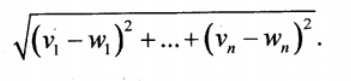

Квадрат расстояние между двумя векторами

In [1213]:
def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

In [1214]:
squared_distance([2,2],[2,2])

0

расстояние между двумя векторами

In [1215]:
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [1216]:
distance([15,1],[1,15])

19.79898987322333

# Матрицы

Образование формы матрицы:


In [1217]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows , num_cols

In [1218]:
Matrix = [[1,1,1],
          [0,1,0],
          [1,0,1]]
shape(Matrix)

(3, 3)

Получение строк и столбцов матрицы

In [1219]:
def get_row(A,i):
    '''Get i matrix row'''
    return A[i]
def get_column(A,j):
    '''Get j matrix column'''
    return [A_i[j]
           for A_i in A]

In [1220]:
A = [[1,0,1],
    [0,1,0],
    [1,0,1]]

In [1221]:
get_row(A,1)

[0, 1, 0]

In [1222]:
get_column(A,0)

[1, 0, 1]

Генерация Матрицы по размеру

In [1223]:
def make_matrix(num_rows,num_cols,entry_fn):
    '''Matrix generation by num_rows, num_cols and entry function'''
    return [[entry_fn(i,j)
           for j in range(num_cols)]
           for i in range(num_rows)]

Входная функция для функции генерации представленной выше, которая
позволяет генерировать единичную матрицу(единицы по диагонали)

In [1224]:
def is_diagonal(i,j):
    return 1 if i == j else 0

In [1225]:
identity_matrix = make_matrix(3,3, is_diagonal)

In [1226]:
identity_matrix

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

Матрицы мы можем использовать для представления набора данных, состоящего из нескольких векторов, рассматривая каждую строку матрицы в качестве вектора. Например, если имеются данные о росте, весе и возрасте n количества человек, то их можно представить в виде матрицы n x 3. 

In [1227]:
#Пример для примечание выше в случае с данными о трёх особях
data = [[175,68,40],
        [163,64,26],
        [193,78,19]]

Матрицу размера n x k можно использовать в качестве линейной функции, которая отображает k-мерные векторы в n-мерные. Некоторые методы и концепции при анализе данных будут использовать подобные функции.

### Матрицу 
также можно использовать для двоичного представления дружеских связей. Например в социальной сети друзей можно представить в виде множества пар
(i,j). Альтернативная реализация подразумевает создание матрицы смежности, т.е такой матрицы А, что элемент А[i][j] равен 1, если узлы i и j связаны между собой и следовательно 0 в противных случаях.

In [1228]:
#Вид взаимосвязей между аккаунтами приведённом в начале примечания выше
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
              (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [1229]:
#Вид взаимосвязей между аккаунтами приведнном
#с помощью матрицы из примечания выше

# пользователь: 1 2 3 4 5
friendships = [[0,1,1,1,0],
               [1,0,1,0,1],
               [1,0,1,1,1],
               [0,1,1,1,0],
               [0,1,1,0,0],]

#При отсутсвии каких либо взаимосвязей:

friendships = [[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],]

#Все друг с другом дружат:

friendships = [[1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],]

# СТАТИСТИКА

## Описание одиночного набора данных

Любой набор данных очевидным образом характеризует сам себя

In [1230]:
# Число друзей
num_friends = [100,49,41,40,25]

#будем использовать далее случайным образом сгенерированную выборку 
#данных для наглядности

#примечание: в данном примере не будет использоваться библиотека numpy
#которую зачастую для подобных задач и используют

num_friends = []
for i in range(0,100):
    n = rnd.randint(5,100)
    num_friends.append(n)
#print(num_friends)

Такое описание может оказаться наилучшим для сравнительного небольшого набора данных. Но для более объемного набора данных это будет выглядеть очень громоздко и, скорее всего, непрозрачно.

Просто представьте , что у вас перед глазами список и 1 млн чисел.
По этой причине пользуются статистиками(стат.показателями), при помощи которых обобщают и передают информацию о существенных признаках, присутствующих в данных.

Вначале вы помещаете количество друзей на гистограмму, испольуя словарь Counter и метод plt.bar

Counter({17: 6, 7: 5, 35: 4, 65: 3, 33: 3, 22: 3, 28: 3, 23: 2, 48: 2, 14: 2, 42: 2, 24: 2, 89: 2, 40: 2, 55: 2, 70: 2, 49: 2, 66: 2, 76: 2, 78: 2, 98: 2, 85: 2, 41: 2, 47: 2, 72: 2, 11: 1, 81: 1, 10: 1, 79: 1, 51: 1, 86: 1, 77: 1, 61: 1, 52: 1, 91: 1, 34: 1, 58: 1, 9: 1, 56: 1, 45: 1, 82: 1, 18: 1, 88: 1, 59: 1, 39: 1, 15: 1, 36: 1, 50: 1, 64: 1, 71: 1, 63: 1, 95: 1, 32: 1, 37: 1, 16: 1, 25: 1, 83: 1, 13: 1, 6: 1, 92: 1, 96: 1, 26: 1})


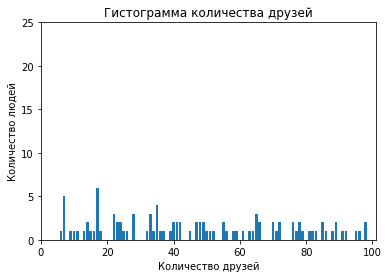

In [1231]:
friend_counts = clt.Counter(num_friends)
print(friend_counts)
xs = range(101)                     # максимальное значение 100
ys = [friend_counts[x] for x in xs] # высота - количество друзей
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Гистограмма количества друзей')
plt.xlabel('Количество друзей')
plt.ylabel('Количество людей')
plt.show()



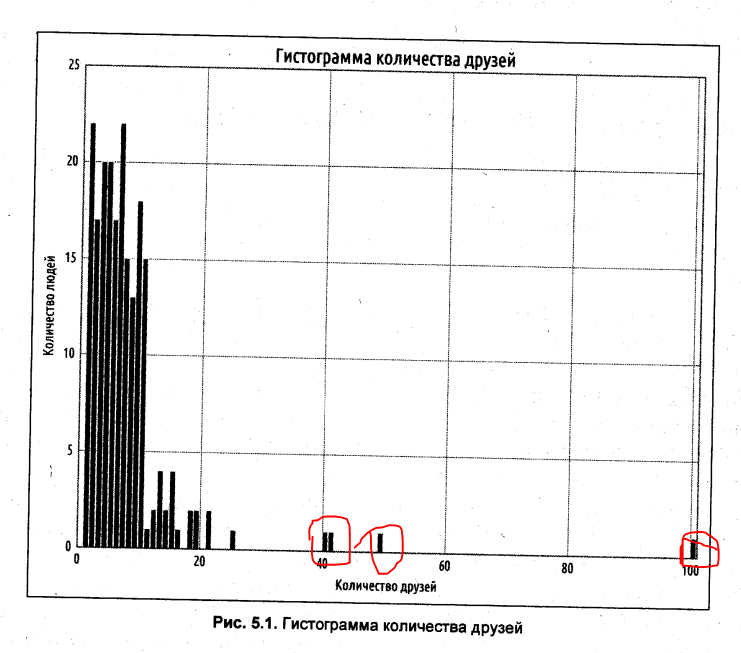

На диаграмме выше красным выделены самые "дружелюбные", однако в некоторых случаях подобные данные можно считать за аномальные, в сравнении с общей тенденцией.

К сожалению, эта диаграмма мало информативна, поэтмоу мы приступим к форматированию некоторых статистик.

самый простой статистикой является число точек данных:

In [1232]:
num_points = len(num_friends) # число точек

In [1233]:
num_points

100

Кроме этого, могут быть интересны наибольшие и наименьшие значения:

In [1234]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

98
6


А также полезными могут быть:

In [1235]:
sorted_values = sorted(num_friends) #Отсортированные значение
smallest_value = sorted_values[0] #Минимум отсортированного списка
second_smallest_value = sorted_values[1] #Следующий минимум
second_largest_value = sorted_values[-2] #Второй максимум с конца

In [1236]:
print(sorted_values, '\n', 'min = ',smallest_value,
      '\n second smallest = ',second_smallest_value,
      '\n second largest = ',second_largest_value,)

[6, 7, 7, 7, 7, 7, 9, 10, 11, 13, 14, 14, 15, 16, 17, 17, 17, 17, 17, 17, 18, 22, 22, 22, 23, 23, 24, 24, 25, 26, 28, 28, 28, 32, 33, 33, 33, 34, 35, 35, 35, 35, 36, 37, 39, 40, 40, 41, 41, 42, 42, 45, 47, 47, 48, 48, 49, 49, 50, 51, 52, 55, 55, 56, 58, 59, 61, 63, 64, 65, 65, 65, 66, 66, 70, 70, 71, 72, 72, 76, 76, 77, 78, 78, 79, 81, 82, 83, 85, 85, 86, 88, 89, 89, 91, 92, 95, 96, 98, 98] 
 min =  6 
 second smallest =  7 
 second largest =  98


## Показатели центра распределения 

Обычно мы хотим иметь некоторое предствавление о том, где находится центр данных. Чаще всего для этих целей используется среднее(или среденее арифметическое) значение, которое берется как сумма данных, деленная на их количество.

In [1237]:
# среднее значение
def mean(x):
    return sum(x) / len(x)

In [1238]:
mean(num_friends)

46.62

Для двух точек средней является точка, лежащая посередине между ними. По мере добавление других точек срендеее значение будет смещаться в разные стороны, в зависимости от значения каждого новой точки

Кроме среднего значнеие, иногда может понадобиться медиана, которая является ближайщим к центру значением (если число точек данных нечетное) либо средним арифметическим, взятым как полусумма двух ближайщих к центру значнией(если число точек чётное).

##### обратите внимание 
Медиана, в отличии от среднего значего - не зависит от каждого значение в наборе данных. Например, если сделать наибольшую точку еще больше( или найменьшую точку еще меньше), то срединные точки останутся неизменными, следовательно, и медиана не изменится.

Функция вычисления медианы имеет более сложную реализацию, чем можно было бы ожидать, в основном из-за того, что приходится учитывать случай с четностью:

In [1239]:
def median(v):
    '''Возвращает ближайшее к середине значение для v'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 # Индекс серединного значения
    
    if n % 2 == 1:
        #Если нечетное, вернуть серединное значение
        return sorted_v[midpoint]
    else:
        #Если четное, вернуть среднее 2=х серединных значений
        lo = midpoint - 1
        hi = midpoint
        return(sorted_v[lo] + sorted_v[hi]) / 2


In [1240]:
median(num_friends)

42.0

Среднее значение, конечно, вычисляется проще, и оно несколько варьирует по мере изменения данных. Если у нас есть n точек, и одна из них увелиилась на любое малое число e , то среднее обязательно увеличится на e/n. (Этот факт делает его подверженным разного рода ухищрениям при калькуляции)
А для того чтобы найти медиану, данные нужно сперва отсортировать, и изменение одной из точек на любое малое число e может увиличить медиану на величину равную e, меньшую чем е, либо не изменить совсем( в зависимости от набора данных).


In [1241]:
#Квантиль

def quantile(x,p):
    '''Возвращает значение в х , соответсвующее р-ому проценту данных'''
    p_index = int(p*len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.10), '\n',
      quantile(num_friends,0.25), '\n',
      quantile(num_friends,0.75), '\n',
      quantile(num_friends,0.90), '\n',)

14 
 23 
 70 
 86 



Реже испольщуют моду - значение или значения, которые встречаются наиболее часто:

In [1242]:
#Мода
def mode(x):
    counts = clt.Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]
print(mode(num_friends))

[17]


## Показатели вариации

Показатели вариации отражают меру изменчивости данных. Как правило, это статистические показатели, для которых значения, близкие к нулю, означиют полное отсутсвие изменчиваости, а большие значения(чтобы это ни означало) - очени большую изменчивость. Например, самым простым показателем является размах, который определяется как разница между максимальным и минимальным значениями данных:

In [1243]:
#рамзах
#слово range в Python уже используется, поэтмоу берем другое
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

92

Размах равен нулю, когда max и min одинаковые, что происходит только  тогда, когда все элементы х равны между собой, и значит, изменчивость в данных отсутствует. И наоборот, когда размах широкий, то максимальное много больше минимального, и изменчивость в данных высокая.

Более точным показателем вариации является дисперсия, вычисляемаема как:

In [1244]:
#Сумма квадратов
def sum_of_squares(x):
    return sum(x * x for x in x)

#Вариация
def variance(x):
    n=len(x)
    deviations = de_mean(x)    
    return sum_of_squares(deviations) / (n-1)

При этом, в каких бы единицах ни измерялись данные (в "друзьях", например), все показатели центра распределения вычиляются в тех же самых единицах измерения. Аналогичная ситуация и с размахом. Дисперсия же измеряется в единицах, которые представляют собой квадрат исходных единиц("Друзья в квадрате"). 
Поскольку такие единицы измерения трудно интерпретировать, то вместо дисперсии мы будем чаще обращаться к стандартному отклонению( корень из дисперсии ): 

In [1245]:
 #стандартное отклонение

def standard_deviation(x):
    return math.sqrt(variance(x))

In [1246]:
standard_deviation(num_friends)

26.9754021885184

Размах и стандартное отклонение так же чувствительны к выбросам, как и среднее. На том же самом примере, если бы у самого дружелюбного пользователя было 200 друзей вместо 100, то стандартное отклонение было бы на 60% больше.

Более надежной альтернативой является вычисление интерквартильного размаха или разности между значнием, соответствующим 75% и значением, соотвествующим 25% данных:

In [1247]:
# интерквартильный размах

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

interquartile_range(num_friends)

47

## Корреляция

Корреляция - взаимная связь, соотношение

Сперва обратимся к ковариации - парному аналогу дисперсии. В отличие от дсперсии, коорая измеряет отклонение одной переменной от ее среднего, ковариация измеряет совместное отклонение двух переменныъ от своих средних.

Будем разбиратьсоя на случайно сгенерированном массиве данных о времени посещения каждым пользователем сайта и количестве друзей.

In [1261]:
num_time = []
for i in range(0,100):
    n = rnd.randint(0,50)
    num_time.append(n)


#num_time = sorted(num_time) #Отсортированные значение
#rnd.shuffle(num_time)
print(num_time)

num_friends = sorted(num_friends)
print(num_friends)

[41, 11, 32, 39, 34, 34, 24, 31, 11, 35, 50, 41, 42, 48, 32, 20, 47, 3, 4, 43, 28, 27, 3, 14, 24, 6, 8, 39, 44, 13, 3, 29, 18, 5, 28, 39, 16, 28, 50, 10, 26, 24, 41, 7, 48, 47, 0, 44, 44, 31, 43, 29, 21, 35, 7, 10, 6, 44, 20, 13, 31, 32, 29, 9, 19, 37, 23, 22, 3, 38, 1, 47, 43, 30, 40, 12, 39, 41, 42, 1, 36, 40, 48, 9, 46, 36, 15, 12, 19, 20, 2, 20, 13, 24, 6, 13, 0, 11, 50, 30]
[6, 7, 7, 7, 7, 7, 9, 10, 11, 13, 14, 14, 15, 16, 17, 17, 17, 17, 17, 17, 18, 22, 22, 22, 23, 23, 24, 24, 25, 26, 28, 28, 28, 32, 33, 33, 33, 34, 35, 35, 35, 35, 36, 37, 39, 40, 40, 41, 41, 42, 42, 45, 47, 47, 48, 48, 49, 49, 50, 51, 52, 55, 55, 56, 58, 59, 61, 63, 64, 65, 65, 65, 66, 66, 70, 70, 71, 72, 72, 76, 76, 77, 78, 78, 79, 81, 82, 83, 85, 85, 86, 88, 89, 89, 91, 92, 95, 96, 98, 98]


In [1262]:
def covariance(x,y):
    '''Ковариация между х и у'''
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, num_friends)

727.6723232323233

Когда соответсующие элементы векторов х и у оба одновременно выше или ниже своих средних, то в сумму входит положительное число. Когда один из них находится выше своего среднего, а другой - ниже, то в сумму входит отрицательное число. 

### следовательно
"Большая" положительная ковариация означает, что х стремится принимать большие значение при больших значенияъ у и малые значения - при малых значениях у. "Большая" отрицательная ковариация означает обратное - х стремится приимать малые значения при большом у и наоборот.
!Ковариация, близкая к нулю, означает, что такой связи не существует.

Тем не менее, этот показатель бывает трудно интерпретировать, и вот почему:

* Единицами измерения ковариации являются произведения единиц входящих переменных(например, число друзей и минуты в день), которые трудно понять (что такое "друг в минуту в день?")

* Если бы у каждого пользователя было в 2 раза больше друзей (но такое же количество минут, проведённых на сайте), то ковариация была бы в 2 раза больше. Однако в некотором смысле степень взаимосвязи между ними осталась бы на прежнем уровне. Говоря иначе, трудно определить, что считать "большой" ковариацией.

Поэтому чаще обращаются к корреляции, в которой ковариация распределяется между стандартными отклонениями обеих переменных:

In [1263]:
#Корреляция
def correlation(x,y):
    """Определение корреляции между двумя массивами данных.
    Передаёт ноль в случае отсутсвия созависимости"""
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y >0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 # если переменные не меняются, то корреляция равна нулю
    
correlation(num_friends, num_time)

-0.12634066170463623

Корреляция является безразмерной величиной, её значения всегда лежат между -1 (идеальная антикорреляция) и 1 (идеальная корреляция). Так, в случае выше с ~0.06 (в моем случае вышел именно такой результат, ибо он основывается на ранее случайно сгенерированных данных, в вашем случае будет иначе) результат представляет собой относительно очень слабую положительную корреляцию.

Однако нам нужно эти данные проверить. 

Человек, у которого 100 друзей, но проводит он на сайте всего одну минуту в день является аномалией и подлежит очистке из набора данных.

In [1266]:
outlier = num_friends.index(100) #Индекс аномалии

#фильтрация
num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]
daily_minutes_good = [x
                     for i,x in enumerate(num_time)
                     if i != outlier]
correlation(num_friends_good, daily_minutes_good)

ValueError: 100 is not in list

<function matplotlib.pyplot.show(*args, **kw)>

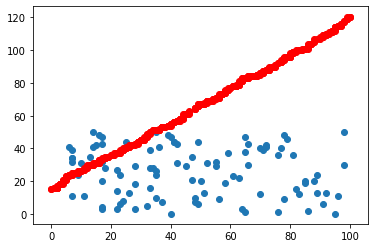

In [1267]:
plt.scatter(num_friends, num_time)
plt.show
plt.scatter(num_friends_good, daily_minutes_good, color='red')
plt.show

# Теория вероятностей

Два события Е и F являются зависимыми, если какое-то знание о наступлении события Е дает нам информацию о наступлении события F, и наоборот. В противном случае они независимые.

Например, если мы дважды бросаем уравновешенную монету, то знание о том, что в первый раз выпадет орел, не дает никакой информации о том, что орел выпадает и во второй раз. Эти события независимые. С другой стороны, знание о том, что в первый раз выпадет орел, определенно, дает нам информацию о том, выпадут ли решки оба раза. (Если в первый раз выпадет орел, то, конечно же, исключаем случай, когда оба раза выпадают решки). Оба эти события зависимые.

С точки зрения математики, говорят, что два события E и F независимы, если вероятность их совместного наступления равна произведению вероятностей их наступления по отдельности:

> P(E,F) = P(E)P(F)

В примере с бросанием монеты вероятность события, что в первый раз выпадет орел, равна 1/2, вероятность события, что оба раза выпадут решки, равна 1/4, а вероятность, что в первый раз выпадет орел и оба раза выпадут решки, равна нулю.

##Условная вероятность

Повторим: когда два события E и F независимы, то по определению вероятность их совместного наступления равна P(E,F) = P(E)P(F)

Если же они являются зависимыми( и при этом вероятность F не равна 0) , то условная вероятность события Е при условии события F определяется так:

> P(E|F) = P(E,F) / P(F)

Под этим понимается вероятность наступления события Е при условии, что известно о наступлении события F